In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns our dataset.

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Check Missing Values :
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see there is no null values present in our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
descr = []
for i in df.columns:
    descr.append([i,df[i].nunique(),df[i].drop_duplicates().values,"Numerical" if df.dtypes[i]=="int64" else "Categorical"])
pd.DataFrame(descr,columns=["Features","Unique value count","Unique values in the column","Type of feature"])    

,Features,Unique value count,Unique values in the column,Type of feature
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",Numerical
1,Attrition,2,"[Yes, No]",Categorical
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]",Categorical
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",Numerical
4,Department,3,"[Sales, Research & Development, Human Resources]",Categorical
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",Numerical
6,Education,5,"[2, 1, 4, 3, 5]",Numerical
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec...",Categorical
8,EmployeeCount,1,[1],Numerical
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",Numerical


The dataframe conveniently displays all the information about the 35 features with object datatypes being listed as categorical features.

Also we can see that few columns have only one value and one column which is just ordinal employee numbers, indicating that this won't contribute any important information in the model building.

In [10]:
df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.columns.shape

(31,)

We can see that there are total of 31 columns in our dataframe. We have to predict the target column("Attrition") which contains 2 values (Yes and No) implying this is a binary classification problem. Hence We are having 30 columns as input features which will be used to create a model to predict the target variable.

# EDA (Exploratory Data Analysis) :

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Univariate Analysis:
For univariate analysis of numerical columns, We can use histograms or distplots as they are adequate to describe the frequency or the distribution of the data within the feature.

In [13]:
numerical = df.select_dtypes(include="int64")

In [14]:
numerical.columns.shape

(23,)

In [15]:
numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe31ac05d10>,
      dtype=object)

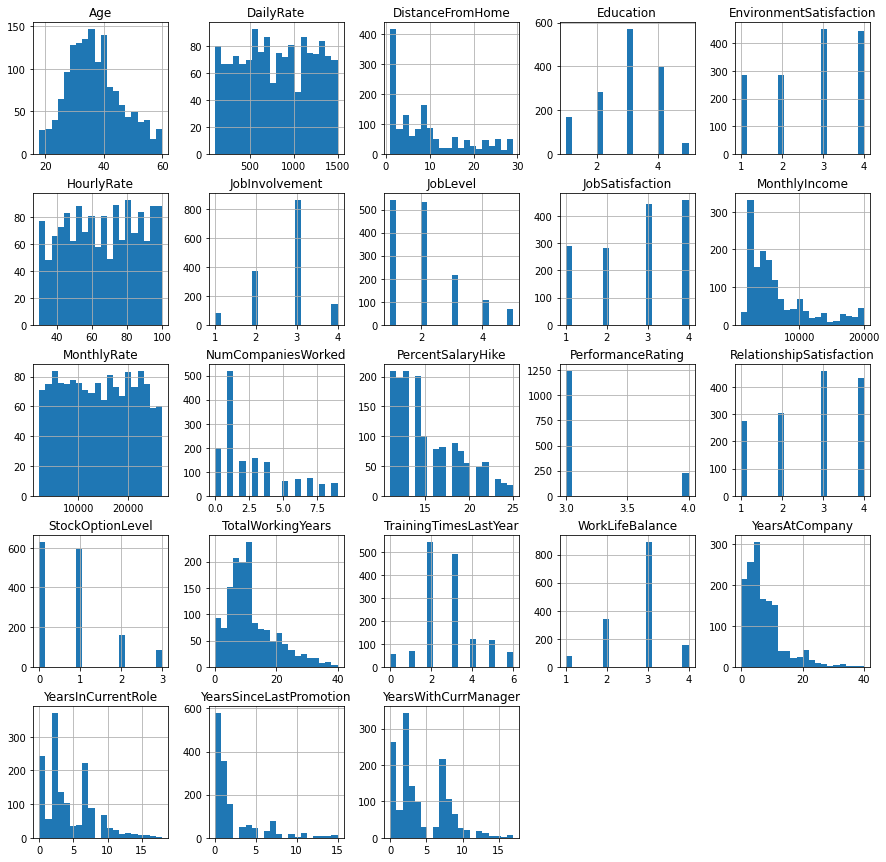

In [16]:
df.hist(bins=20,figsize=(15,15),grid=True)

Observations:

• Most of the employees belong to the 20 to 40 age group

• Major portion of the employees live within 10 km of the office location

• Most of the employees have completed a Bachelor's Degree.

• Employees are highly stisfied with the work environment

• Major amount of employees say that Job involvement is high

• Most of the employees have high satifaction with their jobs but people who feel the satisfaction is poor is also a considerable amount.

• Almost all employees have a high performance rating. A small number of employees have excellent ratings.

• Most of the employees have high relationship satifaction with their jobs but people who feel the relationship satisfaction is poor is also a considerable amount.

• Almost all employees have said there work life balance is better with at IBM

• Most of the employees have received salary hikes below 15%

• Most of the employees have spent less than 10 years at the company indicating a younger workforce.

• Most of the employees have worked for less than 2 companies before.

Now we can analyze categorical features.

In [17]:
categorical = df.select_dtypes(include="object")

In [18]:
categorical.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

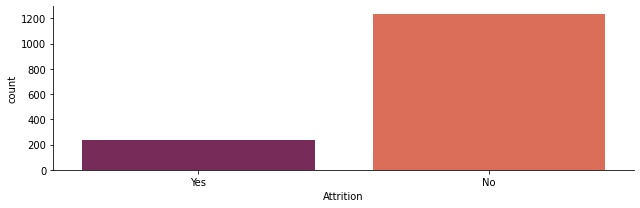

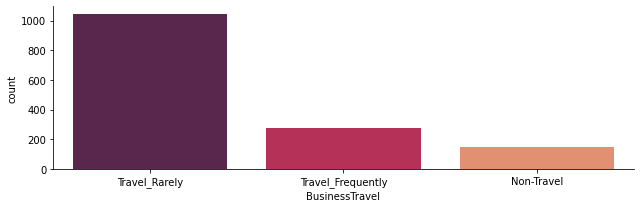

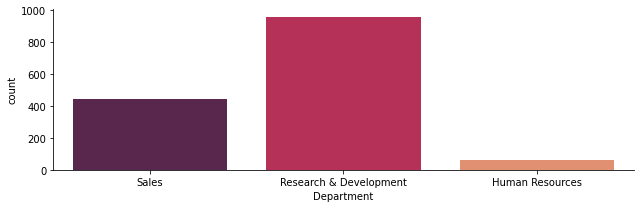

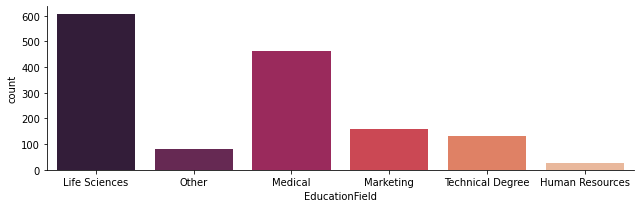

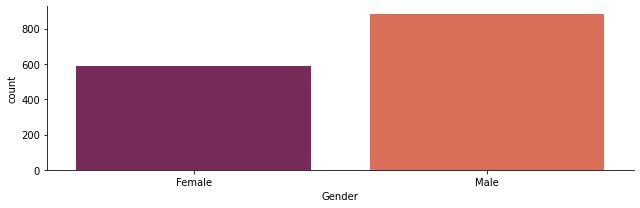

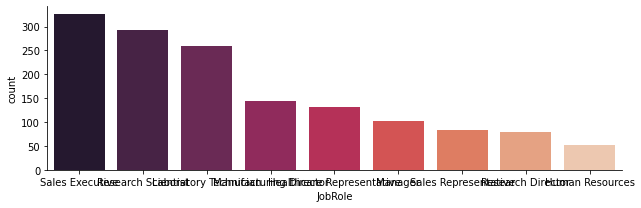

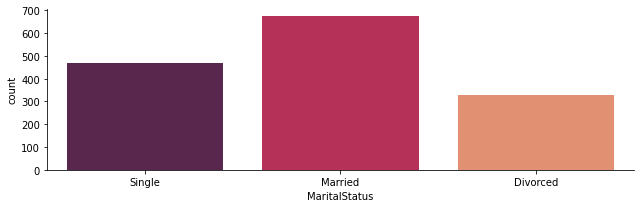

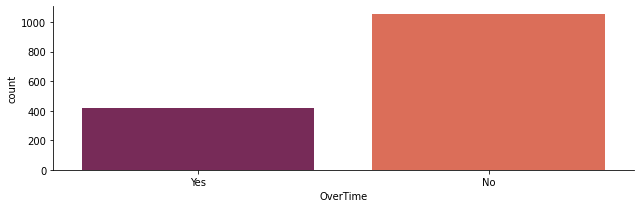

In [19]:
plt.figure(figsize=(15,10))

for i in categorical.columns: 
    sns.catplot(kind="count",x=i,aspect =3, height=3,palette="rocket",data=df)

Observations:

• Target column ("Attrition") is severely imbalance as we have much more "No" than "Yes" instances in the dataset signifying the   fact that we have to use class imbalancing techniques to create an effective model which doesnt end up predicting always "No".

• Most employees are required to rarely travel with least amount of employees belonging to a Non-travel position at the company.

• Maximum number of people belong to the R&D at the company with HR department having the least employees from this dataset.

• Most people have their educational field in the Life Science with Medical accounting for 2nd highest number of employees.

• Male employees are greater in number than females in this dataset.

• Sales Executive being the most common job role, Research Scientist and Laboratory technician comes in at second and third        indicating the fact almost all job roles in the department of "Sales" is of the "Sales Executive" designation.

• Major chunk of the employees are married with Single employees forming the second highest chunk.

• Most employtees do not require overtime to finish their work.

## Bivariate Analysis :

### We can check relation of different features with the target column:

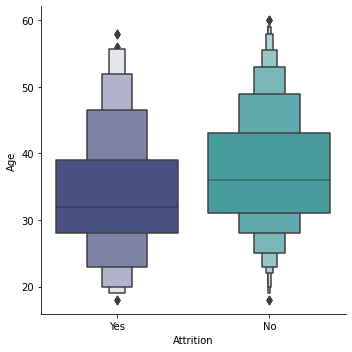

In [20]:
sns.catplot(y = "Age",x = "Attrition",palette = "mako",kind = "boxen",data = df)

We can see that most the employees who left the company belongs to the younger age group as older the employee gets they already have experience and possibly a higher salary which makes them feel settled and comfortable in the company. Also, maximum age group for people who stayed at the company is higher reaffirming the above mentioned fact.

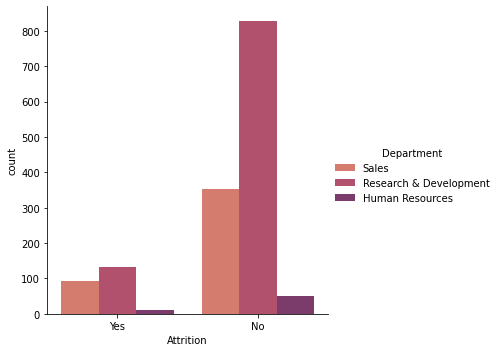

In [21]:
sns.catplot(hue = "Department" ,x = "Attrition",kind="count", palette="flare",data=df)

We can see from the graph above that most employees who stayed at the company are from R&D but its the same scenario in case of employees who left the company.

In [22]:
pd.crosstab(columns=[df.Attrition],index = [df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


We can see that Attrition rate in Females is marginally lower than males with 17% males contributing to the attribution rate.

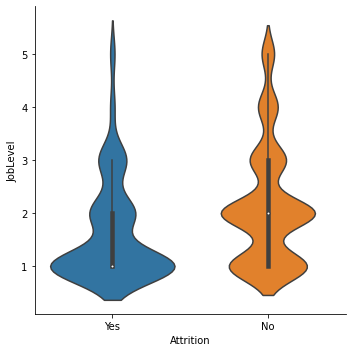

In [23]:
sns.catplot(data=df,kind='violin',x='Attrition',y='JobLevel')

We can observe that employees at lower joblevels tend to leave the company contributing towards the attribution rate. As the Job Level increases, attrition decreases quickly indicating the fact that higher job level comes with more perks which makes them stay at the same company for a longer time.

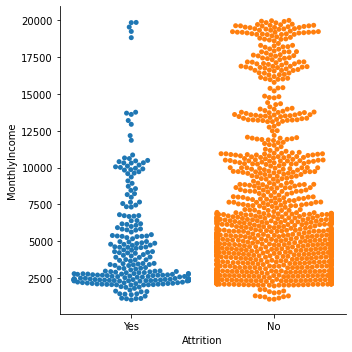

In [24]:
sns.catplot(data=df,kind='swarm',x='Attrition',y='MonthlyIncome')

We can see from this, that lower income bracket range is where the most attrition occurs which makes sense as low salary employees are still trying to find a comfortable job they would like to stay at for a long time and keeps experimenting with jumping to different jobs.

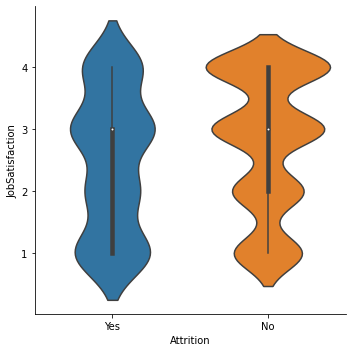

In [25]:
sns.catplot(data=df,kind='violin',x='Attrition',y='JobSatisfaction')

In [26]:
pd.crosstab(columns=[df.Attrition],index = [df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


As visible from the graph and the statistics, people with the least job satisfaction have the highest attrition rate which is logically sound.

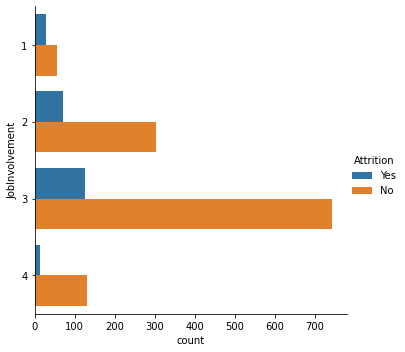

In [27]:
sns.catplot(data=df,kind='count',hue='Attrition',y='JobInvolvement')

We can see from the above graph, that more people with lower job involvement (1) are most likely to leave the company as a major chunk of the total datapoints at 1(lowest involvement) are in the yes category compared to any other job involvement level.

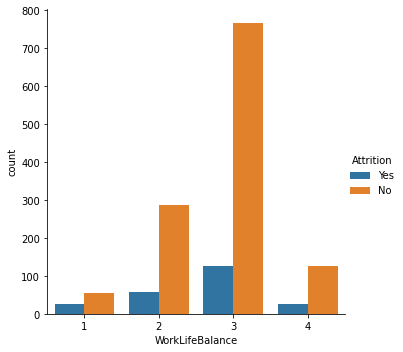

In [28]:
sns.catplot(data=df,kind='count',hue='Attrition',x='WorkLifeBalance')

There is a similar trend as observed in the last case with people having a bad work life balance have a higher chance to leave the company compared to employees with better work life balance.

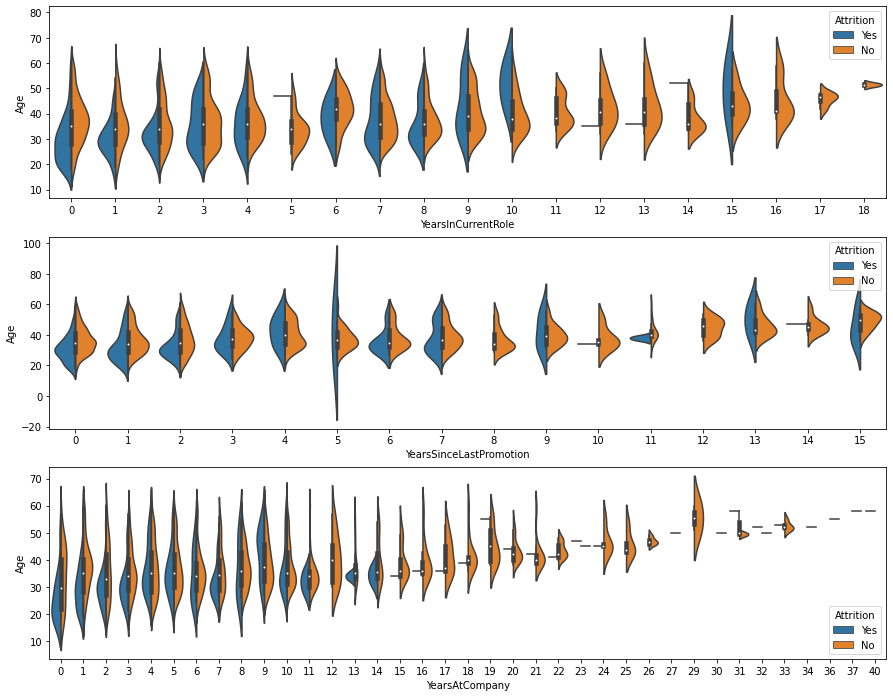

In [29]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
sns.violinplot(x='YearsInCurrentRole', y='Age', split=True, hue='Attrition', data=df)

plt.subplot(3,1,2)
sns.violinplot(x='YearsSinceLastPromotion', y='Age', split=True, hue='Attrition', data=df)

plt.subplot(3,1,3)
sns.violinplot(x='YearsAtCompany', y='Age', split=True, hue='Attrition', data=df)

plt.show()

Observations:

-> As the years in the current role grows by, the attrition rate become almost nil.

-> If the person managed to stay at the company for atleast 14 years, attrition becomes nil from then onwards

-> Employees of ages between 20-40 are more likely to leave if they are not able to earn a promotion at the job.


### We can now check the correlation of the numeric columns with each other.

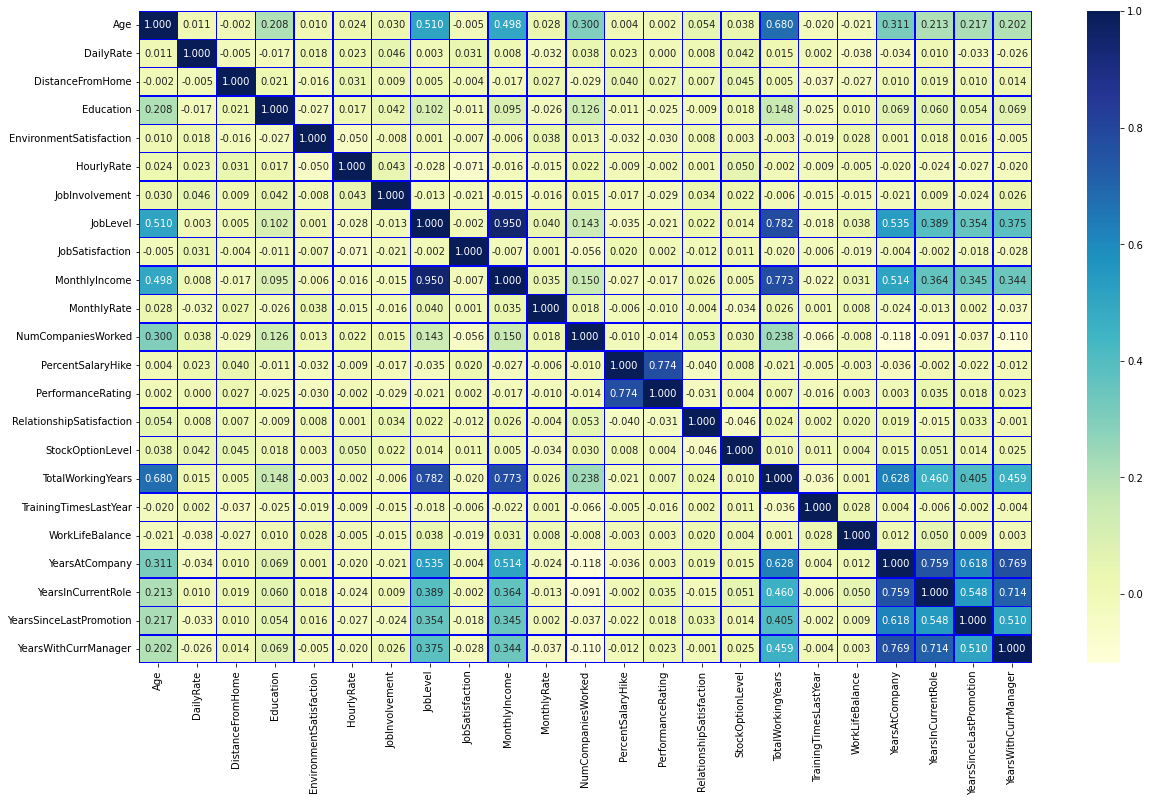

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=0.4,linecolor="Blue",fmt='.3f')

Obervations:

-> JobLevel and Monthly Income is highly related to Age as expected as experienced employees will generally tend to occupy higher positions in the company.

-> MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

-> PerformanceRating is highly related to PercentSalaryHike which makes sense, as Higher performance at the job will result in better hike in salary.

-> Also note that TotalWorkingYears is highly related to JobLevel,Monthly Income and Age which is expected as senior and possibly older employees must have worked for a larger span of time, earns more and are older in age.

-> YearsWithCurrManager is highly related to YearsAtCompany.

-> YearsAtCompany is related to YearsInCurrentRole.

# Encoding Categorical features:

So, we were able to remove skewness from 3 columns using square root transformation. Now we can proceed further to feature selection and see which columns can be used for model building

In [31]:
le = LabelEncoder()
for col in categorical.columns:
    categorical[col]= le.fit_transform(categorical[col])

In [32]:
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


In [33]:
df_encoded = pd.concat([numerical,categorical],ignore_index=False,axis=1)

In [34]:
df_encoded

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,3,0,1,1,3,1,2,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,1,7,0,2,1,3,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,3,0,2,1,1,1,4,1,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,8,0,1,2,3,1,7,1,0


Now, we can checking and removing outliers (whole dataset) and skewness removal in the dataset excluding the target column.

# Checking Outliers:

In [35]:
from scipy.stats import zscore

In [36]:
z = np.abs(zscore(df_encoded))
z.shape

(1470, 31)

In [37]:
#np.where returns the indec where the data points are outliers
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([22, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21, 22,
       21, 16, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21, 22, 16,
       19, 19, 21, 21, 16, 20, 19, 19, 21, 19, 22, 21, 19, 16, 19, 21, 22,
       16, 22, 19, 21, 19, 22, 21, 20, 20,

In [38]:
#extracting the data points those are in the range of (-3,3)
df_encoded_new = df_encoded[(z<3).all(axis=1)]
print(df_encoded.shape)
print(df_encoded_new.shape)

(1470, 31)
(1387, 31)


## **Data Loss**

In [39]:
loss_percent = (1470-1387)/1470*100
print(loss_percent)

5.646258503401361


As long as the data loss is within 8%(standard limit), We can proceed with removing outliers with zscore method.Otherwise, other methods are needed which do not result in huge data loss as it can hinder model building

## **Dividing the Dataset**

In [40]:
x=df_encoded_new.drop("Attrition",axis=1)
y=df_encoded_new["Attrition"]

In [41]:
x.shape,y.shape

((1387, 30), (1387,))

In [42]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel',
       'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime'],
      dtype='object')

## **Checking Skewness:**

Now, we'll have to implement transformation technique to bring the skewness between the standard limit of -0.5 to 0.5

In [43]:
x.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
BusinessTravel             -1.426774
Department                  0.183919
EducationField              0.544868
Gender                     -0.417296
J

In [44]:
transcol = []
for i in x.columns:
    if x.skew()[i].round(2) > 0.55 or x.skew()[i] < -0.55:
        transcol.append(i)
transcol

['DistanceFromHome',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel',
 'OverTime']

In [45]:
len(transcol)

16

In [46]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method="yeo-johnson")

In [47]:
df_encoded_new.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
Attrition                   1.805983
BusinessTravel             -1.426774
Department                  0.183919
EducationField              0.544868
G

In [48]:
power = []
for i in df_encoded.columns:
    if df_encoded_new.skew()[i].round(2) > 0.55 or df_encoded_new.skew()[i].round(2) < -0.55:
        power.append(i)
power

['DistanceFromHome',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'BusinessTravel',
 'OverTime']

In [ ]:
len(sqrtcol)

As we can see there has been a reduction in skewness of 5 columns. Now we create a heatmap and check correlation with target variable

## **Scaling the input features:**

We never scale the target variable as it changes the actual values of the target column which will create problems for our supervised model to predict correctly. 

In [50]:
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.61013332,  0.75061538, -1.48996812, ...,  1.01758848,
         1.23176667,  1.58473733],
       [ 1.37182973, -1.34337244,  0.24456101, ...,  0.59696066,
        -0.14254938, -0.6310194 ],
       [ 0.18248603,  1.33708042, -1.02836604, ..., -1.02269609,
         1.23176667,  1.58473733],
       ...,
       [-1.0804891 , -1.75453754, -0.44055348, ..., -0.22758693,
        -0.14254938,  1.58473733],
       [ 1.37182973,  0.57328582, -1.02836604, ...,  1.01758848,
        -0.14254938, -0.6310194 ],
       [-0.16377603, -0.37222758,  0.24456101, ..., -1.02269609,
        -0.14254938, -0.6310194 ]])

## **Model preprocessing:**

As we know the target variable is hugely imbalanced and to create a accurate model we need to balance the classes using one of the resampling techniques. Here, SMOTE (Synthetic Minority Oversampling Technique) will be used to upsample the minority class so the dataset can be evenly divided into training and testing datasets.

It is also advisable to split the dataset into testing and training set before using oversampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [51]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [53]:
l=[]
for i in range(0,1000):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    sm = SMOTE(random_state=i)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training r2 score: ",(accuracy_score(y_train,pred_train)*100))
        print("Testing r2 score: ",(accuracy_score(y_test,pred_test)*100))
        l.append(i)

At Random State =  472
Training r2 score:  79.0045766590389
Testing r2 score:  78.96253602305475
At Random State =  816
Training r2 score:  79.52981651376146
Testing r2 score:  79.53890489913545
At Random State =  882
Training r2 score:  80.40229885057471
Testing r2 score:  80.40345821325649


At random state = 882, accuracy score is crossing 80%

In [54]:
y_train.value_counts()

1    870
0    870
Name: Attrition, dtype: int64

In [55]:
y_test.value_counts()

0    288
1     59
Name: Attrition, dtype: int64

We can see that the classes are now balanced in the training set using SMOTE, so when the model will be made it will not learn any biases like it was going to if SMOTE wasn't applied.

We'll define the new X_train and y_train for the entire code, so all the models we create can have global access to these upsampled vectors.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=882)
sm = SMOTE(random_state=882)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [57]:
y_train.value_counts()

0    870
1    870
Name: Attrition, dtype: int64

## **Model 1: Logistic Regression:**

In [58]:
log_reg_params = {"penalty": ['l1', 'l2','elasticnet','none'], 'C': [0.01, 0.1, 1, 10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = rand_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", rand_log_reg.best_params_)
print("Best Score for Logistic Regression: ", rand_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Best Score for Logistic Regression:  0.7902298850574713
------------------------------------------


In [59]:
lr = LogisticRegression(solver='saga',C= 0.1, penalty= 'l2').fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [60]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       288
           1       0.46      0.80      0.58        59

    accuracy                           0.81       347
   macro avg       0.71      0.80      0.73       347
weighted avg       0.87      0.81      0.82       347



## **Cross validation:**

In [61]:
pred_lr = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for k in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  86.44524703602514
accuracy score is :  80.69164265129683


At cv=  3
Cross Val score :  87.02202525096693
accuracy score is :  80.69164265129683


At cv=  4
Cross Val score :  86.66230780763273
accuracy score is :  80.69164265129683


At cv=  5
Cross Val score :  87.45526322624212
accuracy score is :  80.69164265129683


At cv=  6
Cross Val score :  87.38213414937552
accuracy score is :  80.69164265129683


At cv=  7
Cross Val score :  87.30920112829659
accuracy score is :  80.69164265129683


At cv=  8
Cross Val score :  87.02287223440302
accuracy score is :  80.69164265129683


At cv=  9
Cross Val score :  87.09351580319323
accuracy score is :  80.69164265129683




In [62]:
lsscore_selected = cross_val_score(lr,x,y,cv = 5).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ",lss)

The cv score is:  0.8745526322624212 
The accuracy score is:  0.8069164265129684


## **AUC ROC Curve:**

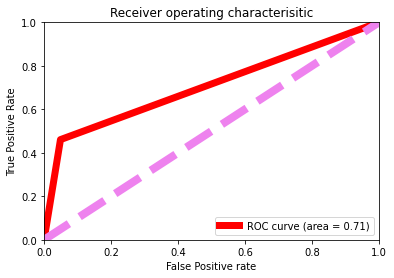

In [63]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

In general, an AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

## **Model 2: Decision Tree**

Here, we'll use Randomizedsearchcv to look for best parameters for hyperparameter tuning. Best_score is the mean of the cross_val_score which is possible with these quantities on a limited dataset. We'll still have to perform cross validation separately to check how cross val impacts our accuracy_score.

In [64]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), "min_samples_leaf": list(range(5,20,1))}
rand_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
rand_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = rand_tree.best_estimator_
print("Best Parameters for Decision Tree: ", rand_tree.best_params_)
print("Best Score for Decision Tree: ", rand_tree.best_score_)

Best Parameters for Decision Tree:  {'min_samples_leaf': 7, 'max_depth': 17, 'criterion': 'entropy'}
Best Score for Decision Tree:  0.8568965517241379


In [65]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [66]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       288
           1       0.31      0.27      0.29        59

    accuracy                           0.77       347
   macro avg       0.58      0.57      0.58       347
weighted avg       0.76      0.77      0.77       347



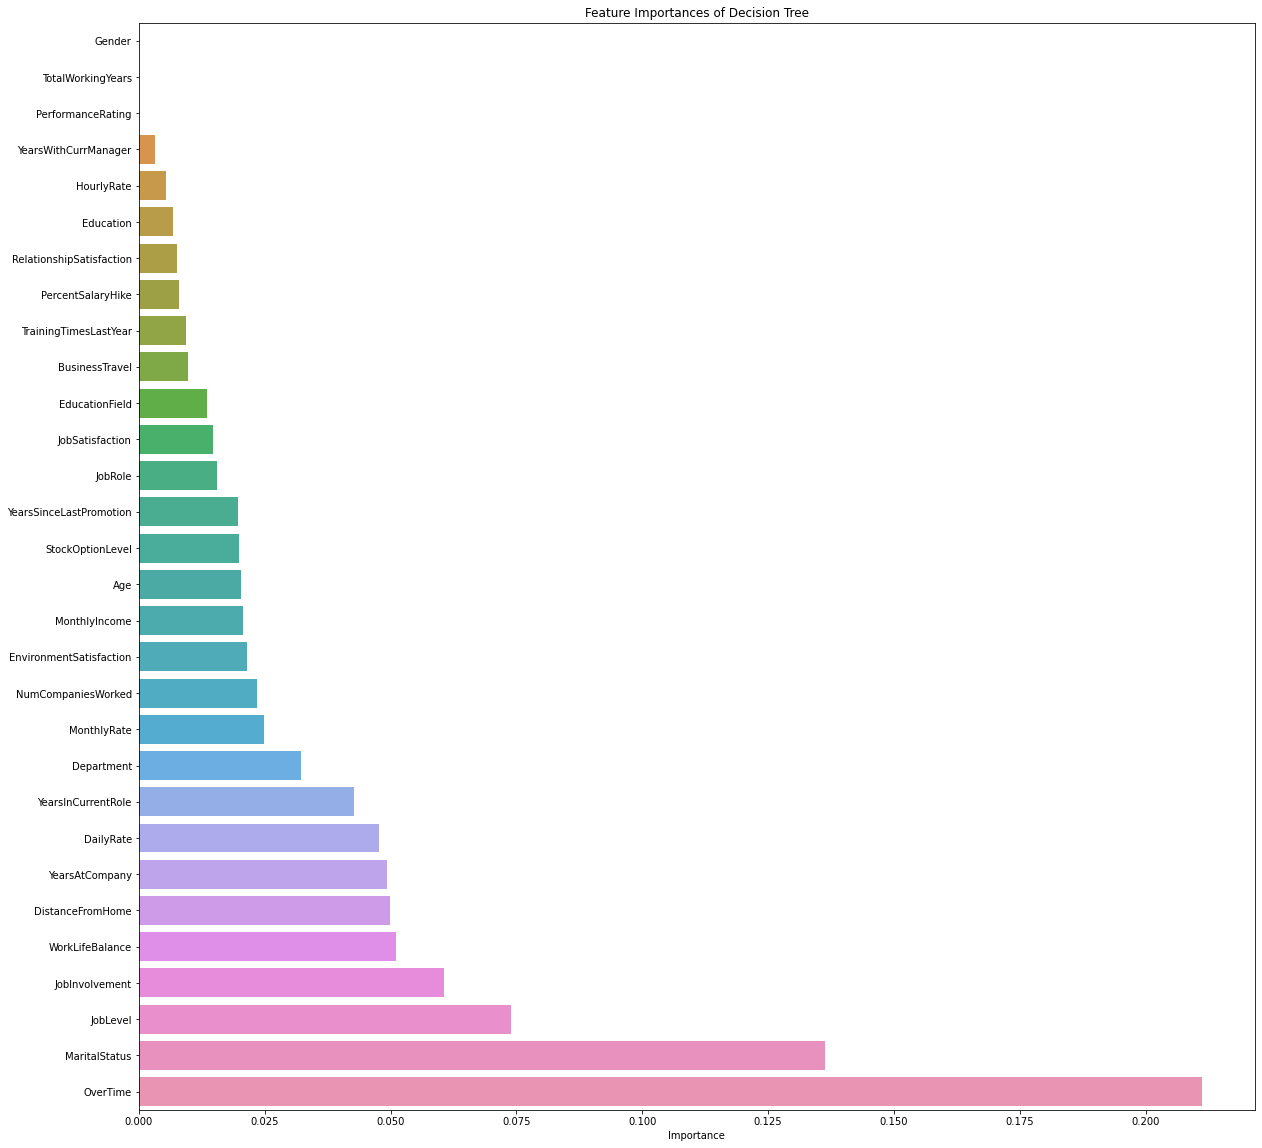

In [102]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=df_encoded_new.drop("Attrition",axis=1).columns).sort_values(by="Importance")
plt.figure(figsize=(20,20))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

We can see how Overtime and MaritalStatus dominates the feature importance above.

In [68]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,x,y,cv=k)
    dtc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  3
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  4
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  5
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  6
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  7
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  8
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267


At cv=  9
Cross Val score :  87.09351580319323
accuracy score is :  77.23342939481267




In [69]:
lsscore_selected = cross_val_score(dec_tree,x,y,cv =5).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ",lss)

The cv score is:  0.8204971041217567 
The accuracy score is:  0.8069164265129684


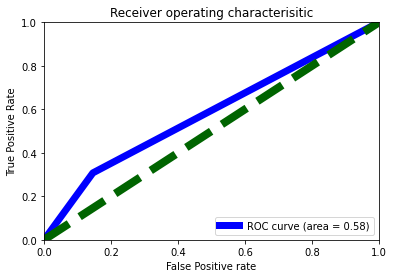

In [70]:
fpr,tpr,thresholds = roc_curve(pred_test2,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## **Model 3 - Random Forest:**

In [71]:
forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)),
                  "min_samples_leaf": list(range(5,20,1)),"n_estimators":[100,150,200,250]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 150, 'min_samples_leaf': 7, 'max_depth': 9, 'bootstrap': True}
Best Score for Random Forest:  0.9051724137931034




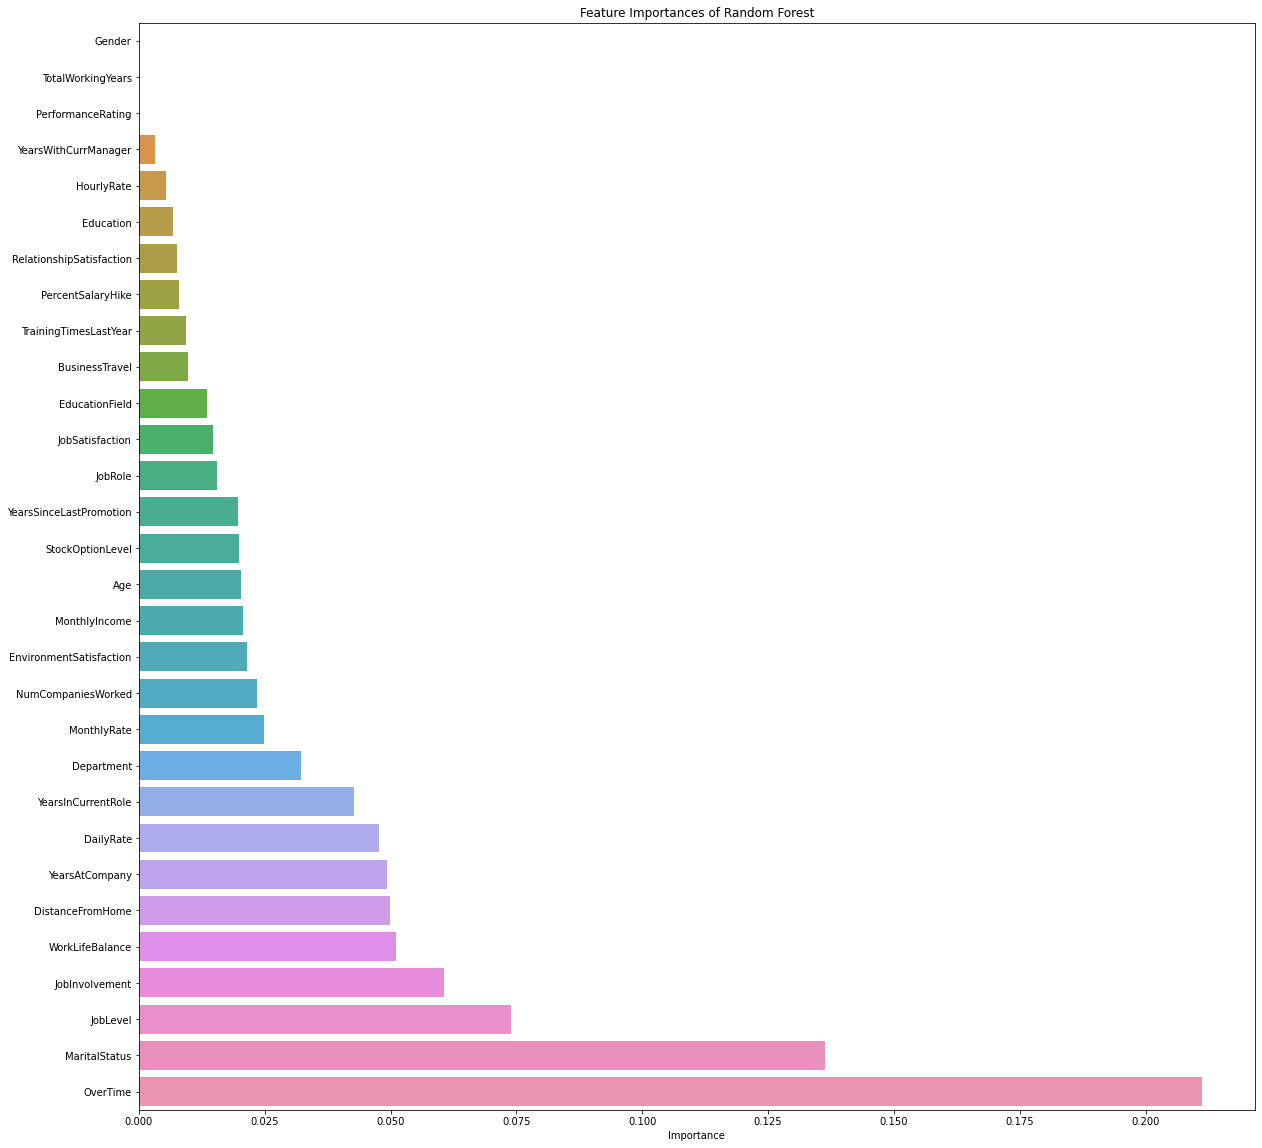

In [72]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=df_encoded_new.drop("Attrition",axis=1).columns).sort_values(by="Importance")
plt.figure(figsize=(20,20))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"],feat.index)

In [73]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=10,n_jobs=-1,n_estimators=250).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

In [74]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       288
           1       0.64      0.39      0.48        59

    accuracy                           0.86       347
   macro avg       0.76      0.67      0.70       347
weighted avg       0.84      0.86      0.84       347



In [75]:
pred_rfc = rfc.predict(X_test)
from sklearn.model_selection import cross_val_score
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,10):
    rsscore=cross_val_score(rfc,x,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  84.71499681874322
accuracy score is :  85.87896253602305


At cv=  3
Cross Val score :  85.00353737934732
accuracy score is :  85.87896253602305


At cv=  4
Cross Val score :  85.14767370192068
accuracy score is :  85.87896253602305


At cv=  5
Cross Val score :  85.43594005661895
accuracy score is :  85.87896253602305


At cv=  6
Cross Val score :  85.22105289346668
accuracy score is :  85.87896253602305


At cv=  7
Cross Val score :  85.14832459556078
accuracy score is :  85.87896253602305


At cv=  8
Cross Val score :  85.29292073616371
accuracy score is :  85.87896253602305


At cv=  9
Cross Val score :  85.2199413489736
accuracy score is :  85.87896253602305




In [76]:
rsscore_selected = cross_val_score(rfc,x,y,cv = 5).mean()
print("The cv score is: ", rsscore_selected, "\nThe accuracy score is: ",rss)

The cv score is:  0.8558008466872712 
The accuracy score is:  0.8587896253602305


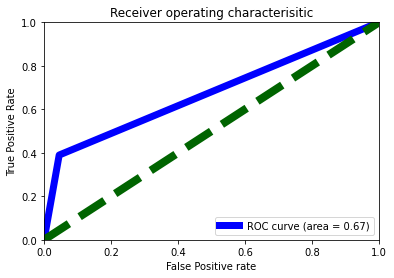

In [77]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test3)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

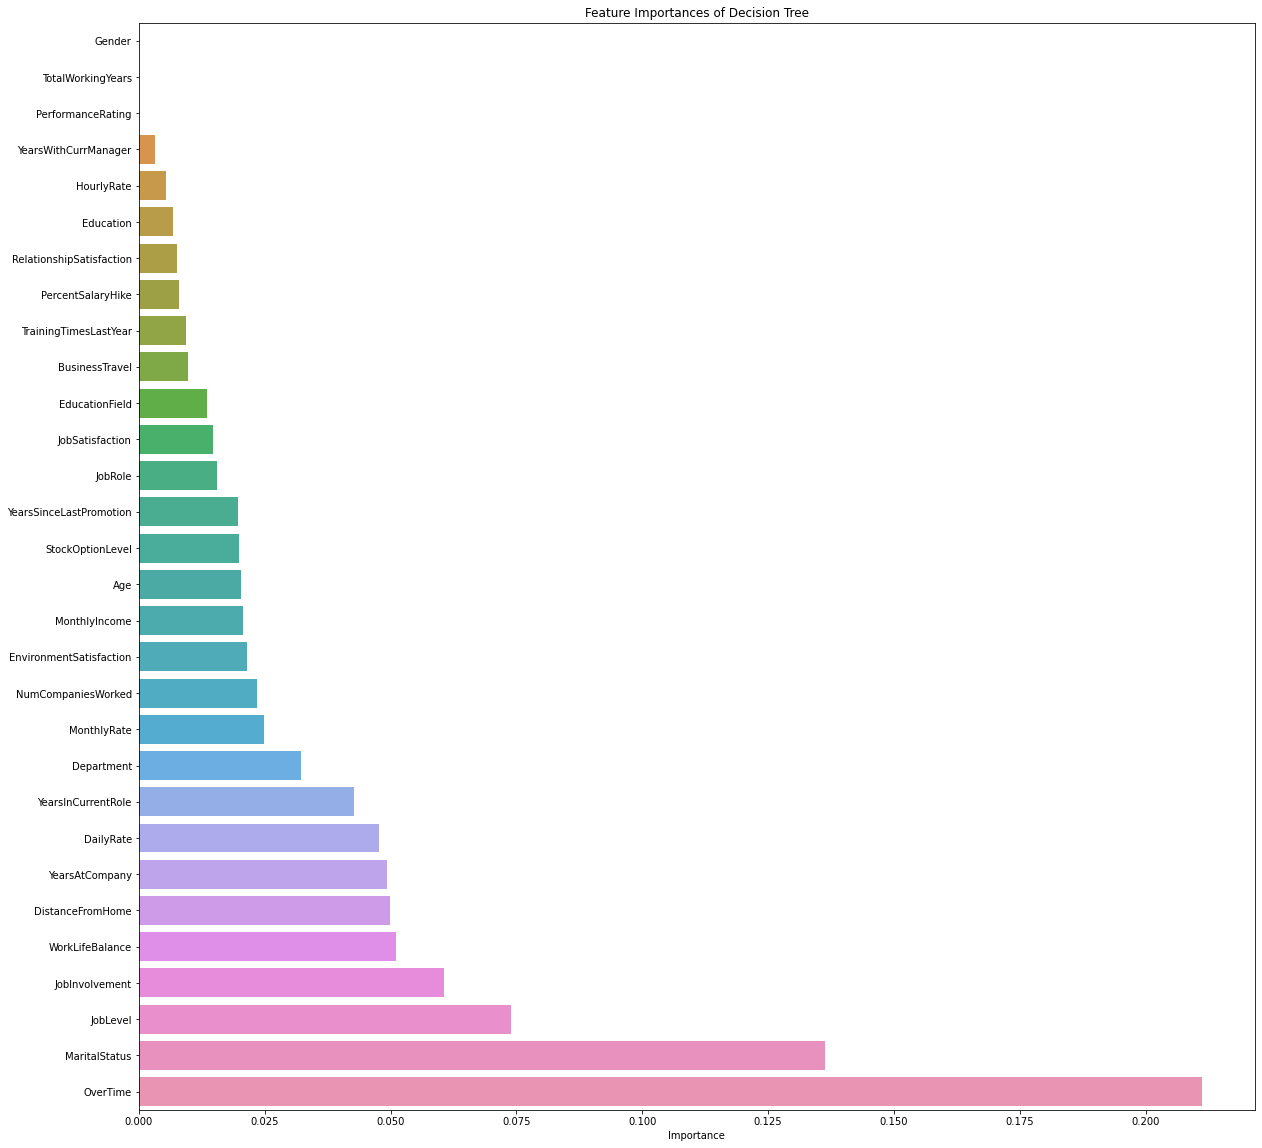

In [92]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=df_encoded_new.drop("Attrition",axis=1).columns).sort_values(by="Importance")
plt.figure(figsize=(20,20))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

## **Model 4: Support Vector Machines**

In [93]:
from sklearn.svm import SVC

In [94]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],"gamma":[0.0001,.001,0.01,0.1,1,10,100]}
rand_svc = RandomizedSearchCV(SVC(), svc_params)
rand_svc.fit(X_train, y_train)
# SVC best estimator
svc = rand_svc.best_estimator_
print("Best Parameters for SVM: ", rand_svc.best_estimator_)
print("Best Score for SVM: ", rand_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  SVC(C=0.1, gamma=1, kernel='poly')
Best Score for SVM:  0.9143678160919542
------------------------------------------


We won't be able to check the feature importances as it's only available for Linear kernel

In [95]:
svm = SVC(C=0.0001, kernel='poly',gamma = 1).fit(X_train, y_train)
pred_train4 = svm.predict(X_train)
pred_test4 = svm.predict(X_test) 

In [96]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       288
           1       0.64      0.39      0.48        59

    accuracy                           0.86       347
   macro avg       0.76      0.67      0.70       347
weighted avg       0.84      0.86      0.84       347



In [97]:
pred_svm = svm.predict(X_test)

svms = accuracy_score(y_test,pred_svm)
for k in range(5,10):
    svmsscore=cross_val_score(svm,x,y,cv=k)
    svmsc=svmsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",svmsc*100)
    print("accuracy score is : ",svms*100)
    print("\n")

At cv=  5
Cross Val score :  85.7956522868348
accuracy score is :  83.86167146974063


At cv=  6
Cross Val score :  85.79607652883516
accuracy score is :  83.86167146974063


At cv=  7
Cross Val score :  85.50689957725135
accuracy score is :  83.86167146974063


At cv=  8
Cross Val score :  85.6525313932629
accuracy score is :  83.86167146974063


At cv=  9
Cross Val score :  85.14686030815064
accuracy score is :  83.86167146974063




In [98]:
svmscore_selected = cross_val_score(svm,x,y,cv = 8).mean()
print("The cv score is: ", svmscore_selected, "\nThe accuracy score is: ",svms)

The cv score is:  0.8565253139326291 
The accuracy score is:  0.8386167146974063


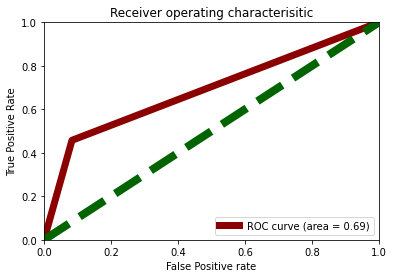

In [99]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test4)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkred",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

we can see from the above models, Random Forest performs the best with an accuracy score of 83.86% and ROC curve area = 0.69. We'll save this model to pickle file.

## **Model Saving:**

In [100]:
import pickle
filename = "HR_attrition_pred.pkl"
pickle.dump(rfc,open(filename,'wb'))

## **Conclusion:**

In [101]:
h = np.array(y_test)
predicted = np.array(rfc.predict(X_test))
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))
df_comp

,original,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
342,0,0
343,0,0
344,1,0
345,0,0
